In [2]:
import pandas as pd
import folium

In [3]:
import lasio

log = lasio.read('data/SPE_006/OilSandsDB/Logs/00-01-01-073-05W5-0.LAS')


In [7]:
well_locations = pd.read_csv("data/MannvilleWells_LatLong_notab.csv")

In [8]:
well_locations.head()

SitID      UWI (AGS)                  UWI  HorID   Pick  Quality  \
0  102496  0674010812000  00/12-08-067-01W4/0  13000  475.0        3   
1  102497  0674020807000  00/07-08-067-02W4/0  13000  515.0        3   
2  102498  0674021109000  00/09-11-067-02W4/0  13000  480.0        3   
3  102500  0674022910000  00/10-29-067-02W4/0  13000  549.0        3   
4  102501  0674023406000  00/06-34-067-02W4/0  13000  529.0        2   

         lat         lng  
0  54.785907 -110.129320  
1  54.782284 -110.269446  
2  54.785892 -110.186851  
3  54.829624 -110.269422  
4  54.840471 -110.224832

In [9]:
well_center_coord = [55.736558, -112.615421]

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='cartodbpositron', width = 640, height=480)

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

map_wells.save('plot_data.html')

In [10]:
map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='https://c.tile.opentopomap.org/{z}/{x}/{y}.png', width = 640, height=480, attr="<a href=https://opentopomap.org/>OpenTopoMap</a>")

for index, row in well_locations.iterrows():
    popup = folium.Popup('<i>' + row['Pick'] + '<i>', parse_html=True)
    folium.CircleMarker(location=[row['lat'], row['lng']], radius=int(row['Quality'])).add_to(map_wells)

map_wells.add_child(folium.LatLngPopup())

map_wells.save('plot_data_2.html')

TypeError: can only concatenate str (not "float") to str

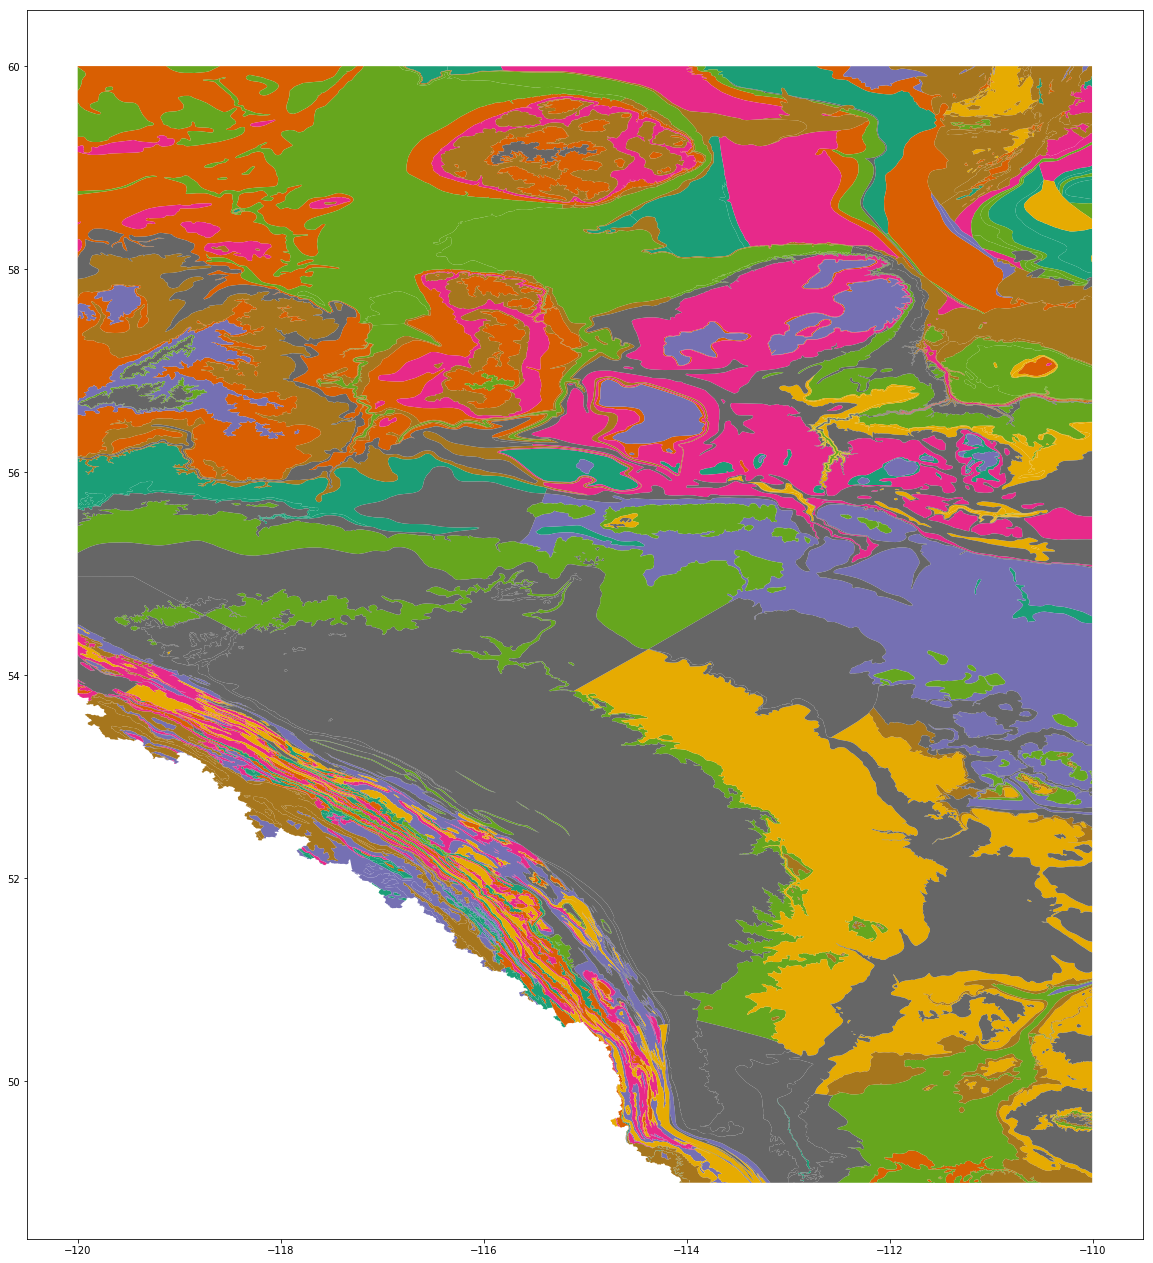

In [11]:
import geopandas as gpd

%matplotlib inline

bedrock_shp = gpd.read_file("data/MAP_600/DIG_2013_0018/bdrk_py_ll.shp")
bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

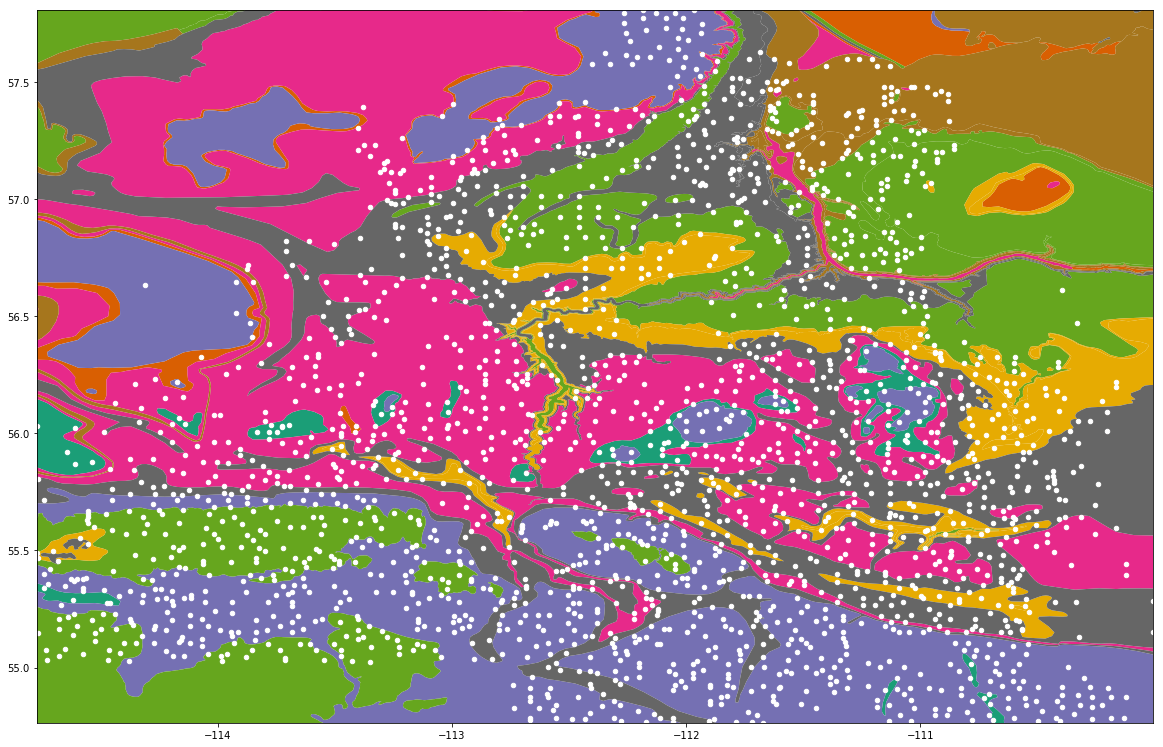

In [12]:
from shapely.geometry import Point, Polygon

geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
geo_df = gpd.GeoDataFrame(well_locations, geometry =geom)
geo_df.head()

ax = bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

geo_df.plot(markersize=20, ax=ax, color="white")

In [9]:
print(bedrock_shp.crs)

{'init': 'epsg:4269'}


In [31]:
from shapely.geometry import Point, Polygon
import fiona
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt

%matplotlib inline

well_locations = pd.read_csv("data/MannvilleWells_LatLong_notab.csv")

well_locations.dropna(inplace=True, subset=['Pick'])

well_locations['Pick'] = well_locations['Pick'].astype(float)

geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
geo_df = gpd.GeoDataFrame(well_locations, geometry =geom)
geo_df.head()

#geo_df = geo_df.to_crs(epsg=3857)

geo_df.crs = fiona.crs.from_epsg(4269)

geo_df = geo_df.to_crs(epsg=3857)


ax = geo_df.plot(markersize=20, legend=False, column="Pick",figsize=(20,40))



#fig, ax = plt.subplots(figsize=(20,40))

#sns.scatterplot(ax = ax, x="lng", y="lat", hue="Pick", data=well_locations)

#ax = bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))



add_basemap(ax, zoom=8)

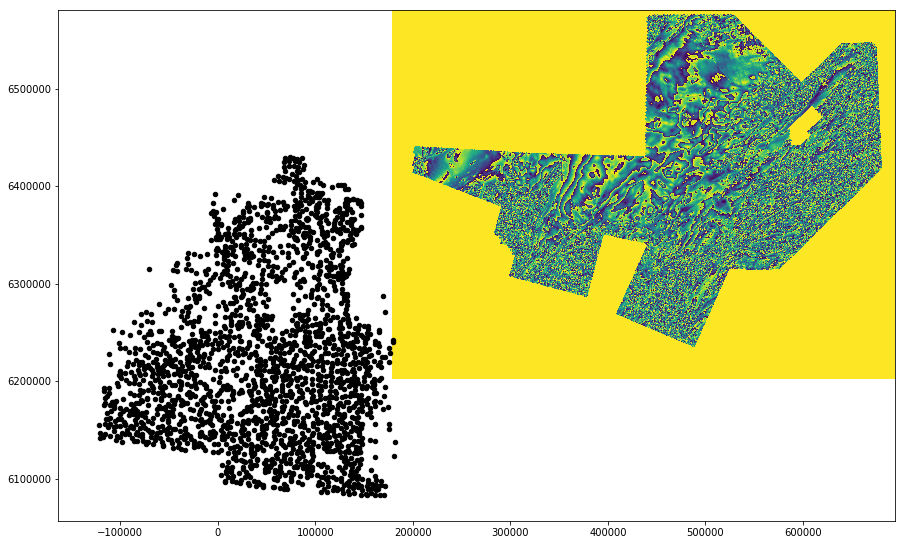

In [18]:
import geopandas as gpd
import rasterio
from rasterio import plot

import matplotlib.pyplot as plt

%matplotlib inline

#bedrock_shp = gpd.read_file("data/canvec_50K_AB_Elevation/contour_1.shp")
#bedrock_shp.plot(cmap='Dark2', figsize=(20,40))

geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
geo_df = gpd.GeoDataFrame(well_locations, geometry =geom)
geo_df.head()


geo_df.crs = fiona.crs.from_epsg(4269)

geo_df = geo_df.to_crs(epsg=32613)


#ax = bedrock_shp.plot(figsize=(20,40))

raster = rasterio.open('data/Geophys/100m_mag_residualtotal_athabasca.tif')

fig, ax = plt.subplots(figsize=(15, 15))

rasterio.plot.show(raster, ax=ax)

#minx, miny, maxx, maxy = geo_df.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)

#geo_df.crs = {'init': 'epsg:4269'}

geo_df.plot(markersize=20, ax=ax, color="black")

In [ ]:
raster.crs


geo_df.crs = {'init' :'epsg:32613'}

geo_df.head()

In [19]:
geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
well_geodf = gpd.GeoDataFrame(well_locations, geometry =geom)

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='Stamen Terrain', width = 640, height=480)

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

#well_geodf.head()

map_wells.add_child(folium.LatLngPopup())

map_wells

In [ ]:
geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
well_geodf = gpd.GeoDataFrame(well_locations, geometry =geom)

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='https://s3.amazonaws.com/elevation-tiles-prod/normal/{z}/{x}/{y}.png', width = 640, height=480, attr="<a href=https://endless-sky.github.io/>Endless Sky</a>")

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

#well_geodf.head()

map_wells.add_child(folium.LatLngPopup())

map_wells

In [14]:
geom = [Point(xy) for xy in zip(well_locations['lng'],well_locations['lat'])]
well_geodf = gpd.GeoDataFrame(well_locations, geometry =geom)

map_wells = folium.Map(location=well_center_coord, zoom_start=7,tiles='https://c.tile.opentopomap.org/{z}/{x}/{y}.png', width = 640, height=480, attr="<a href=https://endless-sky.github.io/>Endless Sky</a>")

for index, row in well_locations.iterrows():
  folium.CircleMarker(location=[row['lat'], row['lng']], radius=1).add_to(map_wells)

#well_geodf.head()

map_wells.add_child(folium.LatLngPopup())

map_wells